In [1]:
import sys
print(sys.version_info)

try:
    import numpy as np
    import skfuzzy as fuzz
    from skfuzzy import control as ctrl
    import matplotlib.pyplot as plt
    %matplotlib inline
except:
    %pip install -U numpy, matplotlib scikit-fuzzy

sys.version_info(major=3, minor=11, micro=1, releaselevel='final', serial=0)


In [2]:
names = ['low', 'average', 'high']
namesDiff = ['below','zero','above']

/usr/local/lib/python3.11/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


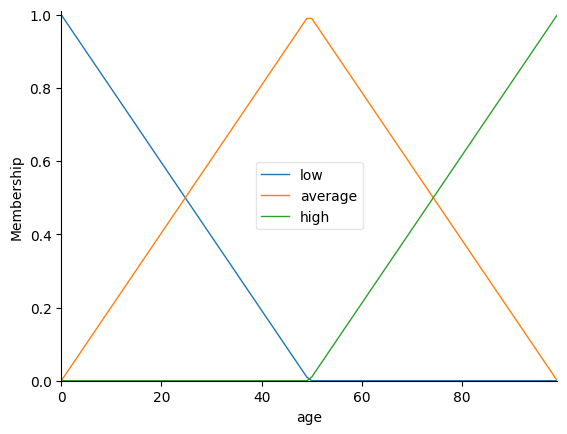

In [3]:
# FUSSIFICATION
MIN = 0; MAX = 100
age = ctrl.Antecedent(np.arange(MIN,MAX, 1), 'age')
age.automf(3, names=names)
age.view()

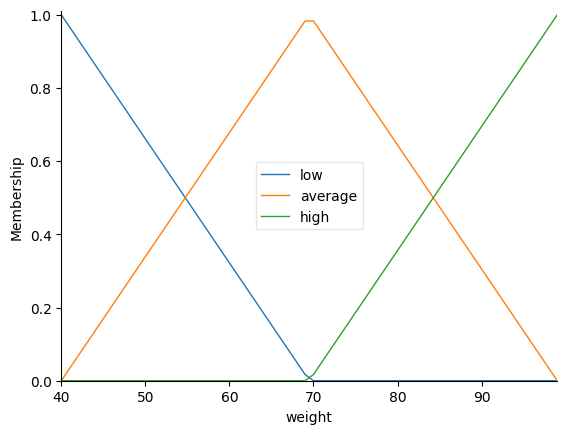

In [4]:
MIN = 40; MAX = 100
weight = ctrl.Antecedent(np.arange(MIN,MAX, 1), 'weight')
weight.automf(3, names=names)
weight.view()

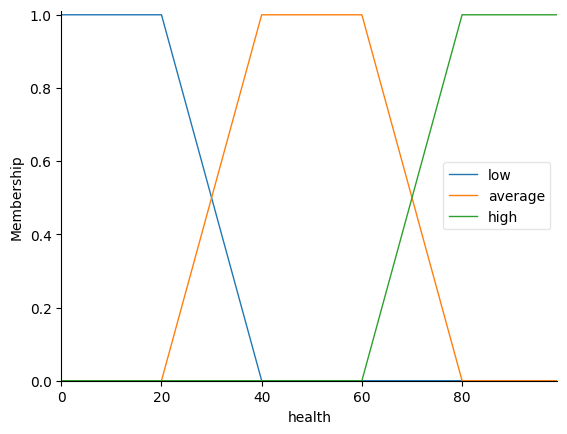

In [5]:
MIN = 0; MAX = 100
health = ctrl.Consequent(np.arange(MIN,MAX, 1), 'health')
health.automf(3, names=names)
health['low'] = fuzz.membership.trapmf(np.arange(MIN,MAX, 1),[0,0,20,40])
health['average'] = fuzz.membership.trapmf(np.arange(MIN,MAX, 1),[20,40,60,80])
health['high'] = fuzz.membership.trapmf(np.arange(MIN,MAX, 1),[60,80,MAX,MAX])
health.view()

In [6]:
## FUZZY RULES
rule1 = ctrl.Rule(weight['average'], health['high'])
rule2 = ctrl.Rule(weight['low'] & age['high'], health['low'])
rule3 = ctrl.Rule(weight['high'], health['low'])
problem_ctrl  = ctrl.ControlSystem([rule1, rule2, rule3])
problem = ctrl.ControlSystemSimulation(problem_ctrl)

79.4560644515292


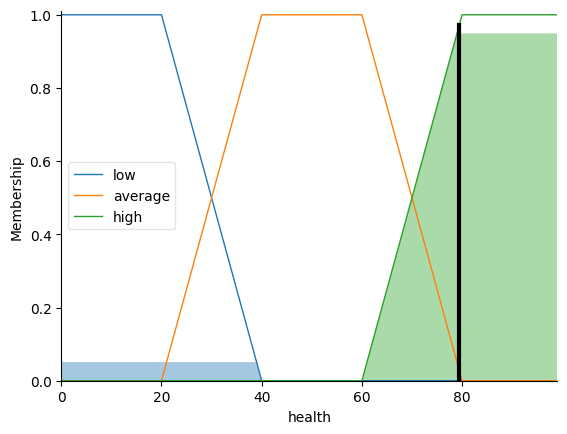

In [7]:
## APPLICATION
problem.input['age'] = 32
problem.input['weight'] = 71

problem.compute()

print(problem.output['health'])
health.view(sim=problem)